# Module -> Cell Crop Preprocessing Module
April 9, 2025

In [ ]:
# Image Preprocessing Script
# numpy, opencv-python, torch, torchvision, matplotlib, scikit-image
# 2025-04-08

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

directory = 'D:/jungha/2025 Spring/MEC510/term project/Processed_Data/03 Module Test/0_EL/NY_TC_0_#1.jpg'

# image name separated from directory, separate the .bmp extension
image_name = directory.split('/')[-1].split('.')[0]
print(image_name)

# image folder name separated from directory 
folder_name = directory.split('/')[-2]
print(folder_name)

if not os.path.exists(directory):
    print(f"Directory {directory} does not exist.")
    exit(1)

save_directory = 'D:/jungha/2025 Spring/MEC510/term project/Processed_Data/03 Module Test/'+ folder_name +'/' + image_name
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

NY_TC_0_#1
0_EL


## SOBEL HORIZONTAL DIRECTION!

In [3]:
img = cv2.imread(directory, cv2.IMREAD_GRAYSCALE)
# sobel edge, dx =1, dy=0
sobel_edges = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_edges = cv2.convertScaleAbs(sobel_edges)

# fig, ax = plt.subplots(1, 2, figsize=(15, 10))

# ax[0].imshow(img, cmap='gray')
# ax[0].set_title('Original Grayscale Image')
# ax[0].axis('off')

# ax[1].imshow(sobel_edges, cmap='gray')
# ax[1].set_title('Sobel Detection')
# ax[1].axis('off')

# plt.show()

# show the edges image not using matplotlib
# figure = plt.figure(figsize=(15, 10))
# plt.imshow(sobel_edges, cmap='gray')

# save the edgses image
# cv2.imwrite('edges.png', sobel_edges)

Text(0.5, 1.0, 'Binary Sobel Image')

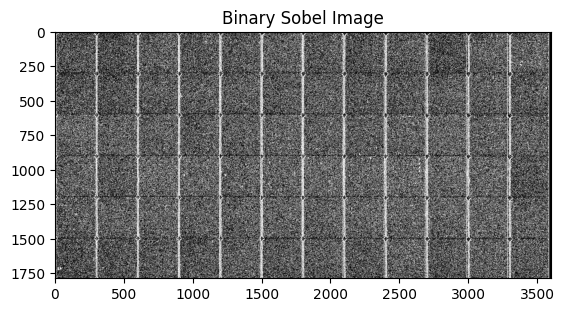

In [4]:
_, binary_sobel = cv2.threshold(sobel_edges, 200, 255, cv2.THRESH_BINARY)

plt.imshow(binary_sobel, cmap='gray')
plt.title('Binary Sobel Image')


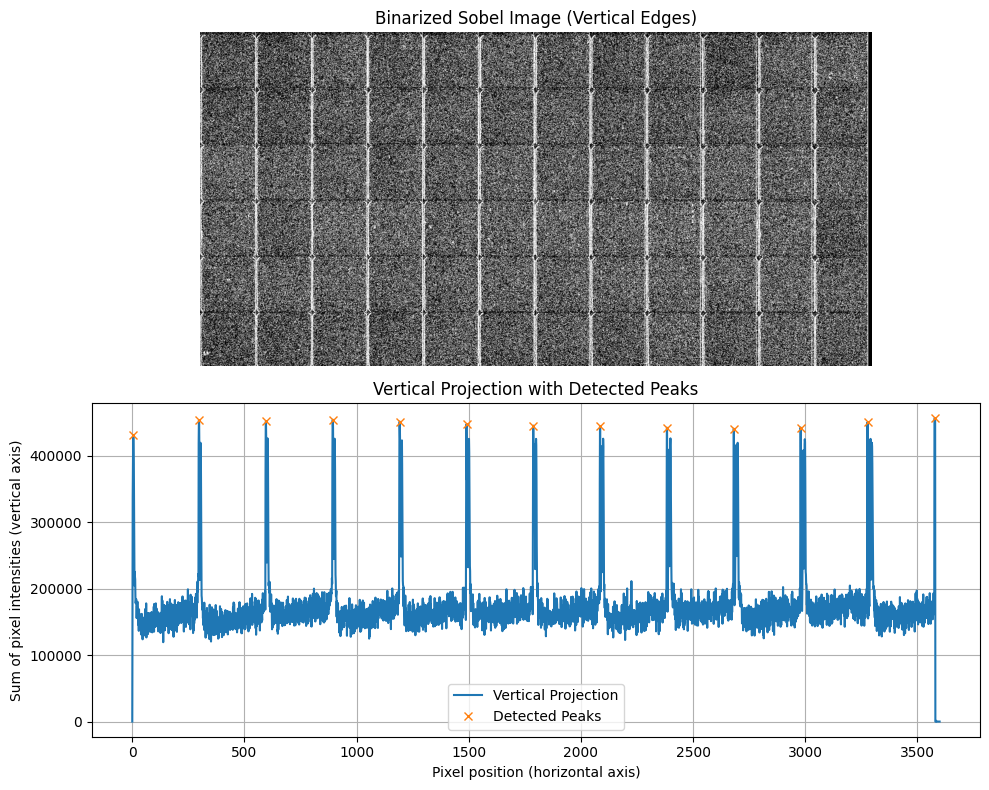

In [5]:
from scipy.signal import find_peaks

new_vertical_projection = np.sum(binary_sobel, axis=0)
# Step 3: Detect peaks in vertical projection
new_peaks, _ = find_peaks(new_vertical_projection, prominence=300000)
# Step 4: Visualize results
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Show binary Sobel image
ax[0].imshow(binary_sobel, cmap='gray')
ax[0].set_title('Binarized Sobel Image (Vertical Edges)')
ax[0].axis('off')

# Show vertical projection with detected peaks
ax[1].plot(new_vertical_projection, label='Vertical Projection')
ax[1].plot(new_peaks, new_vertical_projection[new_peaks], "x", label='Detected Peaks')
ax[1].set_title('Vertical Projection with Detected Peaks')
ax[1].set_xlabel('Pixel position (horizontal axis)')
ax[1].set_ylabel('Sum of pixel intensities (vertical axis)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

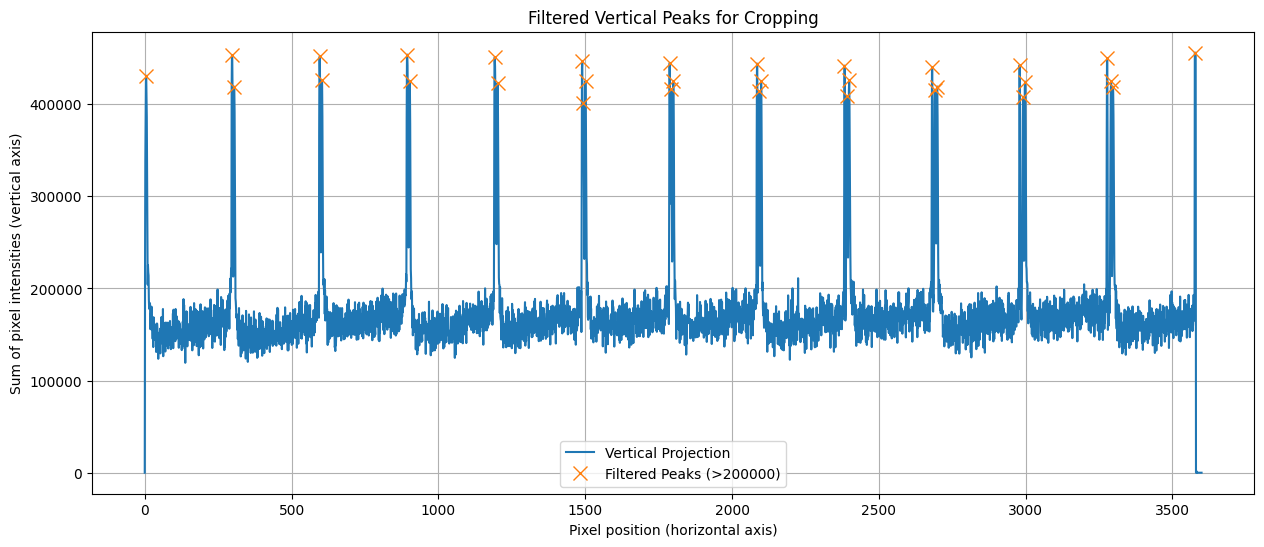

array([   5,  297,  304,  596,  603,  894,  902, 1192, 1202, 1490, 1494,
       1501, 1788, 1792, 1800, 2085, 2092, 2099, 2383, 2392, 2399, 2681,
       2691, 2699, 2979, 2991, 2998, 3278, 3291, 3297, 3577])

In [6]:
# High-pass filter on peaks (threshold: 250000)
high_peaks, properties = find_peaks(new_vertical_projection, height=260000)

# Visualize the filtered peaks clearly
plt.figure(figsize=(15, 6))
plt.plot(new_vertical_projection, label='Vertical Projection')
plt.plot(high_peaks, new_vertical_projection[high_peaks], "x", markersize=10, label='Filtered Peaks (>200000)')
plt.title('Filtered Vertical Peaks for Cropping')
plt.xlabel('Pixel position (horizontal axis)')
plt.ylabel('Sum of pixel intensities (vertical axis)')
plt.legend()
plt.grid(True)
plt.show()

# Output detected high peaks positions clearly
high_peaks

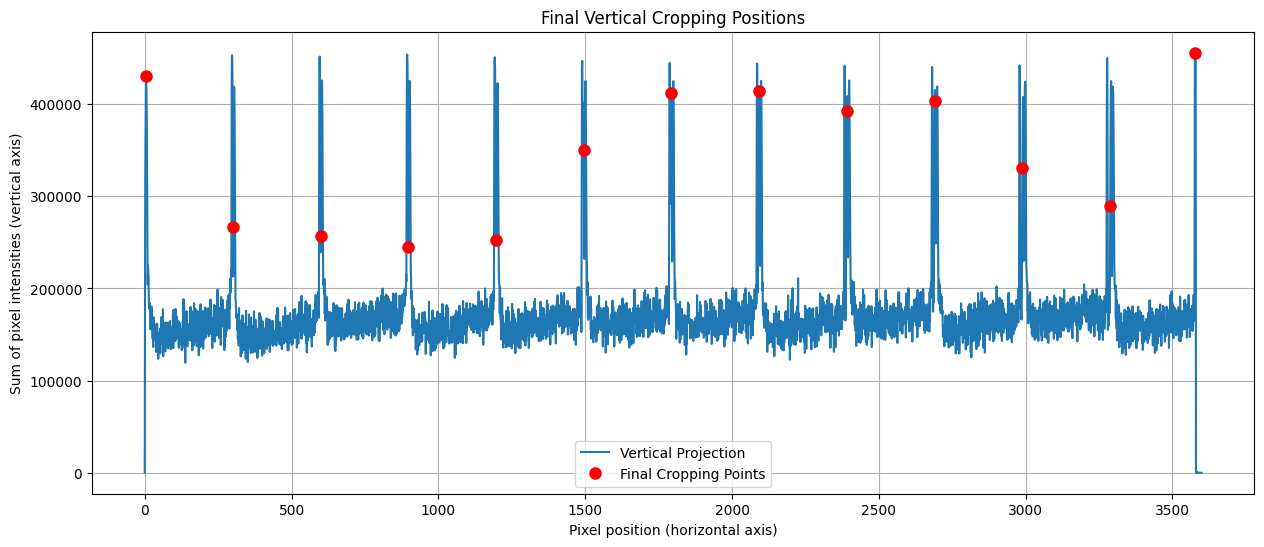

array([   5,  300,  599,  898, 1197, 1495, 1793, 2092, 2391, 2690, 2989,
       3288, 3577])

In [7]:
from sklearn.cluster import DBSCAN

# Convert peak positions into a format suitable for clustering (reshape into 2D array)
peak_positions = high_peaks.reshape(-1, 1)

# Apply DBSCAN clustering algorithm to group nearby peaks into single clusters
clustering = DBSCAN(eps=15, min_samples=1).fit(peak_positions)

# Get cluster labels
labels = clustering.labels_

# Calculate mean position for each cluster
horizontal_peaks = np.array([peak_positions[labels == i].mean() for i in np.unique(labels)]).astype(int)

# Sort the lines for clarity
horizontal_peaks.sort()

# Visualize clearly
plt.figure(figsize=(15, 6))
plt.plot(new_vertical_projection, label='Vertical Projection')
plt.plot(horizontal_peaks, new_vertical_projection[horizontal_peaks], "ro", markersize=8, label='Final Cropping Points')
plt.title('Final Vertical Cropping Positions')
plt.xlabel('Pixel position (horizontal axis)')
plt.ylabel('Sum of pixel intensities (vertical axis)')
plt.legend()
plt.grid(True)
plt.show()

# Output the final cropping positions
horizontal_peaks

In [8]:

def crop_columns(image_path, horizontal_lines, output_dir):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    output_dir = output_dir + 'cropped_columns/'

    if image is None:
        print(f"❌ Error: Image not found at {image_path}")
        return

    height, width = image.shape
    horizontal_lines = sorted(set(horizontal_lines))

    os.makedirs(output_dir, exist_ok=True)

    # Crop columns using adjacent vertical lines
    for idx in range(len(horizontal_lines) - 1):
        x1 = horizontal_lines[idx]
        x2 = horizontal_lines[idx + 1]

        # Safety check
        if x2 > x1 and x2 <= width:
            column = image[:, x1:x2]
            save_path = os.path.join(output_dir, f"column_{idx+1}.png")
            cv2.imwrite(save_path, column)

    print(f"✅ {len(horizontal_lines) - 1} columns saved to '{output_dir}'.")
    
# Run the column cropping
crop_columns(directory, horizontal_peaks, save_directory)


✅ 12 columns saved to 'D:/jungha/2025 Spring/MEC510/term project/Processed_Data/03 Module Test/0_EL/NY_TC_0_#1_cropped/cropped_columns/'.


# VERTICAL SOBEL

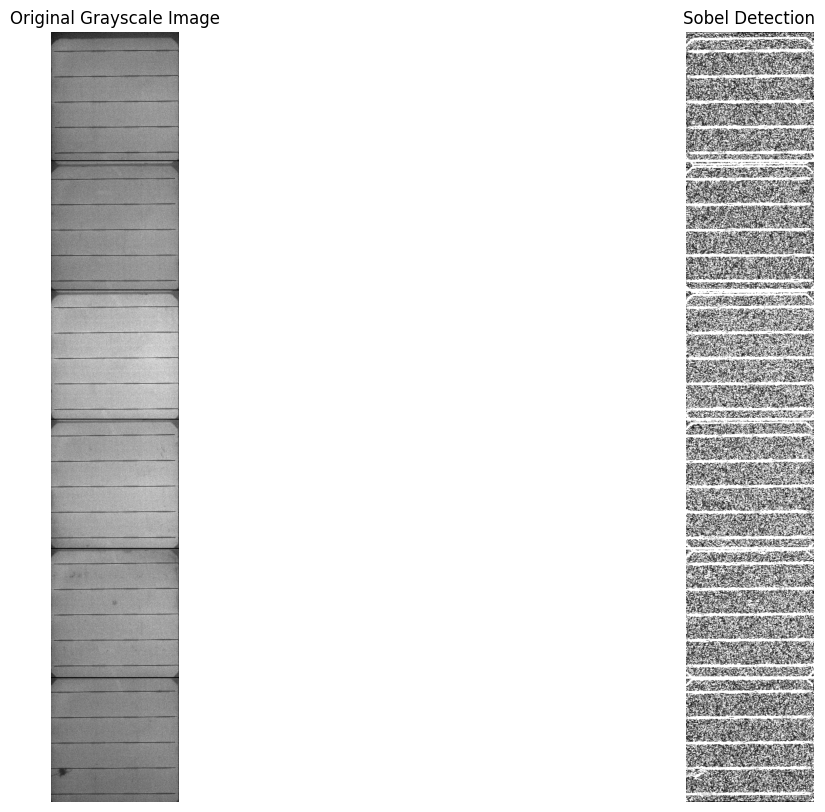

39
final vertical lines length: 36
[  15   43  102  162  220  279  298  339  398  457  517  576  598  640
  696  758  817  877  898  936  996 1053 1115 1172 1198 1235 1293 1352
 1413 1471 1498 1532 1589 1648 1707 1768]
these are the selected peaks: 
 [  15  307  599  891 1183 1475 1768]
✅ 6 rows saved from column_1.png
✅ 6 rows saved from column_10.png
✅ 6 rows saved from column_11.png
✅ 6 rows saved from column_12.png
✅ 6 rows saved from column_2.png
✅ 6 rows saved from column_3.png
✅ 6 rows saved from column_4.png
✅ 6 rows saved from column_5.png
✅ 6 rows saved from column_6.png
✅ 6 rows saved from column_7.png
✅ 6 rows saved from column_8.png
✅ 6 rows saved from column_9.png


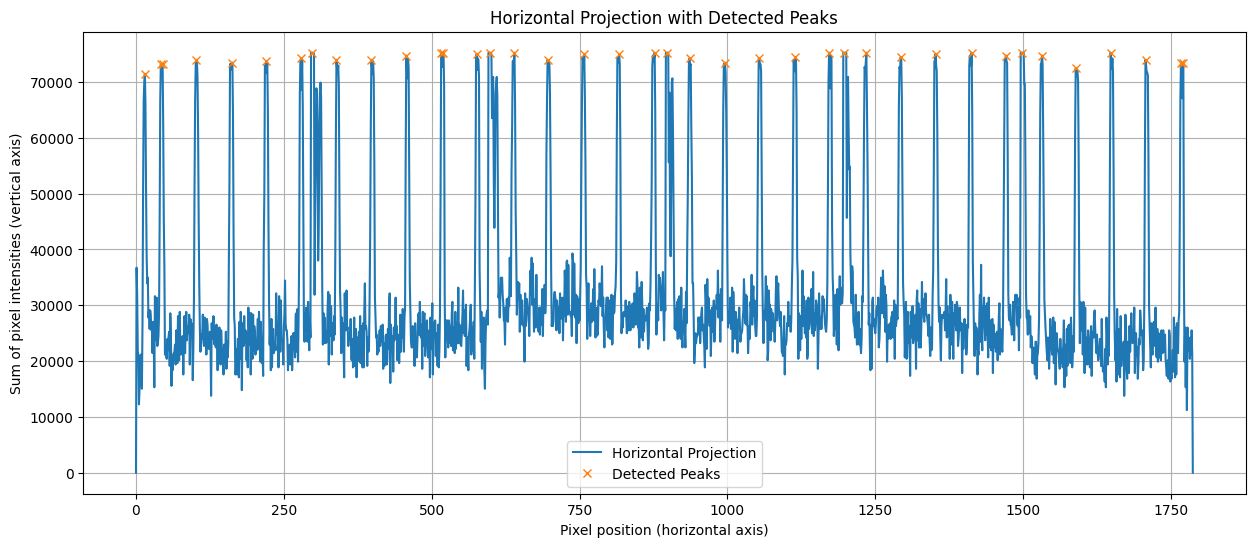

In [ ]:
vertical_directory = save_directory + '/cropped_columns/'

for filename in os.listdir(vertical_directory):
    if filename.endswith('.png'):
        img = cv2.imread(os.path.join(vertical_directory, filename), cv2.IMREAD_GRAYSCALE)
        break

# sobel edge, dx =0, dy=1
sobel_edges_horizontal = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges_horizontal = cv2.convertScaleAbs(sobel_edges_horizontal)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(sobel_edges_horizontal, cmap='gray')
ax[1].set_title('Sobel Detection')
ax[1].axis('off')

plt.show()

# save the edgses image
cv2.imwrite('edges.png', sobel_edges_horizontal)

_, binary_sobel_hor = cv2.threshold(sobel_edges_horizontal, 200, 255, cv2.THRESH_BINARY)

new_horizontal_projection = np.sum(binary_sobel_hor, axis=1)
new_peaks, _ = find_peaks(new_horizontal_projection, prominence=50000)

print(len(new_peaks))

#figure.plt(new_vertical_projection, label='Vertical Projection')
#figure.plt(new_peaks, new_vertical_projection[new_peaks], "x", label='Detected Peaks')
# how do i make just the peaks figures
plt.figure(figsize=(15, 6))
plt.plot(new_horizontal_projection, label='Horizontal Projection')   
plt.plot(new_peaks, new_horizontal_projection[new_peaks], "x", label='Detected Peaks')
plt.title('Horizontal Projection with Detected Peaks')
plt.xlabel('Pixel position (horizontal axis)')
plt.ylabel('Sum of pixel intensities (vertical axis)')
plt.legend()
plt.grid(True)

# Convert peak positions into a format suitable for clustering (reshape into 2D array)
peak_positions = new_peaks.reshape(-1, 1)

# Apply DBSCAN clustering algorithm to group nearby peaks into single clusters
clustering = DBSCAN(eps=10, min_samples=1).fit(peak_positions)

# Get cluster labels
labels = clustering.labels_

# Calculate mean position for each cluster
final_vertical_lines = np.array([peak_positions[labels == i].mean() for i in np.unique(labels)]).astype(int)

# Sort the lines for clarity
final_vertical_lines.sort()

# Output the final cropping positions
print('final vertical lines length: '+ str(len(final_vertical_lines)))
print(final_vertical_lines)

from numpy import linspace
vertical_peaks = np.linspace(final_vertical_lines[0], final_vertical_lines[-1], num=7, dtype=int)

print(f'these are the selected peaks: \n {vertical_peaks}')

import os
import cv2
import numpy as np

def crop_rows(image_path, vertical_lines, output_dir):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"❌ Error: Image not found at {image_path}")
        return

    height, width = image.shape
    vertical_lines = sorted(set(vertical_lines))
    os.makedirs(output_dir, exist_ok=True)

    for idx in range(len(vertical_lines) - 1):
        y1 = vertical_lines[idx]
        y2 = vertical_lines[idx + 1]
        if y2 > y1 and y2 <= height:
            row = image[y1:y2, :]
            filename = os.path.basename(image_path).replace('.png', '')
            save_path = os.path.join(output_dir, f"{filename}_row_{idx+1}.png")
            cv2.imwrite(save_path, row)

    print(f"✅ {len(vertical_lines) - 1} rows saved from {os.path.basename(image_path)}")

# Loop through each column image and apply horizontal cropping
vertical_directory = os.path.join(save_directory, 'cropped_columns')
os.makedirs(save_directory, exist_ok=True)

for filename in os.listdir(vertical_directory):
    if filename.endswith('.png'):
        image_path = os.path.join(vertical_directory, filename)
        crop_rows(image_path, vertical_peaks, save_directory)


# DONE